<h1 style="text-align:center;">Etape 3: Modélisation </h1>

# 1. Importation des packages

In [15]:
import pandas as pd

import numpy as np   # Importe la bibliothèque numpy pour la manipulation de tableaux (arrays).

from sklearn.model_selection import train_test_split  # Importe la fonction train_test_split pour diviser les données en ensembles d'entraînement et de test.
#Model
from sklearn.tree import DecisionTreeRegressor  # Importe le modèle de régression par arbre de décision.
from sklearn.ensemble import RandomForestRegressor  # Importe le modèle de régression par forêt aléatoire.
from sklearn.linear_model import LinearRegression, Lasso  # Importe les modèles de régression linéaire et de régression Lasso.
#metrique
from sklearn.metrics import classification_report, confusion_matrix  # Importe des métriques pour évaluer les performances des modèles.
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importe GridSearchCV pour effectuer une recherche des meilleurs hyperparamètres et ShuffleSplit pour diviser les données en ensembles de validation.
from sklearn.model_selection import GridSearchCV, ShuffleSplit

import matplotlib.pyplot as plt  # Importe la bibliothèque matplotlib pour la visualisation de données.
import seaborn as sns  # Importe la bibliothèque seaborn pour la visualisation de données basée sur matplotlib.

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import mlflow
import datetime
import warnings

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler  # Importe StandardScaler pour la normalisation des données.

# 2. Configuration MLFlow

In [16]:
import os
os.environ['MLFLOW_TRACKING_USERNAME']= "rihemmanel54"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "3e93c19c879ea3562d4638daa2bab19d3eabb3c9"

#setup mlflow
mlflow.set_tracking_uri('https://dagshub.com/rihemmanel54/Mlops_Car_Price_Prediction') #your mlfow tracking uri
mlflow.set_experiment("Mlops_Car_Price_Prediction-experiment")

MlflowException: API request to endpoint /api/2.0/mlflow/experiments/get-by-name failed with error code 404 != 200. Response body: '<!DOCTYPE html>
<html lang="en-US">
  <head data-suburl="">
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
    <meta http-equiv="X-UA-Compatible" content="IE=edge"/>
    
    
      <meta name="viewport" content="width=device-width, initial-scale=1"/>
    
    <meta name="referrer" content="no-referrer"/>
    <meta name="_csrf" content="s3GJiF5XZB4PRQuUAreaVr_i3p86MTY5Njg0NjQ4MDY2ODU3MDQzNQ"/>
    <meta name="_suburl" content=""/>
    <meta name="_appversion" content="f971559b78f32c7f36fca73f367b6f82c1d84d10" />
    <meta name="_bareRepo" content=""/>

    
    
  <script>(function(w, d, s, l, i) {
      w[l] = w[l] || [];
      w[l].push({
        'gtm.start':
          new Date().getTime(), event: 'gtm.js'
      });
      var f = d.getElementsByTagName(s)[0],
        j = d.createElement(s),
        dl = l != 'dataLayer' ? '&l=' + l : '';
      j.async = true;
      j.src =
        'https://www.googletagmanager.com/gtm.js?id=' + i + dl;
      f.parentNode.insertBefore(j, f);
    })(window, document, 'script', 'dataLayer', 'GTM-PGHTMDN');</script>

    

    
    
      
    
    
  
    <title>Page Not Found · DAGsHub</title>
    <meta name="description"
          content="DagsHub is where people create data science projects. Use DagsHub to discover, reproduce and contribute to your favorite data science projects."/>
  
  
  <meta property="og:url" content="https://dagshub.com/"/>
  <meta property="og:type" content="website"/>
  <meta property="og:site_name" content="DagsHub">
  <meta property="og:title" content="The home for data science collaboration">
  <meta property="og:description"
        content="DagsHub is where people create data science projects. Use DagsHub to discover, reproduce and contribute to your favorite data science projects.">
  <meta property="og:image" content="https://dagshub.com/img/open_graph/dagshub-logo.png"/>
  <meta property="og:image:type" content="image/png">
  <meta property="og:image:width" content="1200">
  <meta property="og:image:height" content="1200">
  <meta property="og:image" content="https://dagshub.com/img/open_graph/dagshub-mark.png">
  <meta property="og:image:type" content="image/png">
  <meta property="og:image:width" content="1200">
  <meta property="og:image:height" content="620">
  <meta property="og:image" content="https://dagshub.com/img/open_graph/dagshub-dags.png">
  <meta property="og:image:type" content="image/png">
  <meta property="og:image:width" content="1200">
  <meta property="og:image:height" content="620">
  
  <meta property="twitter:site" content="@TheRealDagsHub">
  <meta property="twitter:creator" content="@TheRealDagsHub">
  <meta property="twitter:card" content="summary_large_image">
  <meta property="twitter:title" content="DagsHub">
  <meta property="twitter:description"
        content="DagsHub is where people create data science projects. Use DagsHub to discover, reproduce and contribute to your favorite data science projects.">
  <meta property="twitter:image:src" content="https://dagshub.com/img/open_graph/dagshub-logo.png">
  <meta property="twitter:image:width" content="1200">
  <meta property="twitter:image:height" content="1200">

  <script type="application/ld+json">
    {
        "@context": "http://schema.org",
        "@type": "WebSite",
        "name": "DagsHub",
        "url": "https://dagshub.com/",
        "sameAs": [
            "https://www.facebook.com/DagsHub/",
            "https://twitter.com/TheRealDagsHub/",
            "https://linkedin.com/company/dagshub/"
        ],
        "potentialAction": {
        "@type": "SearchAction",
        "description": "Search for data science projects on DagsHub.",
        "target": "https://dagshub.com/explore/repos?q={search_term}",
        "query-input": "required name=search_term"
        }
    }
  </script>


    

    <link rel="shortcut icon" href="/img/favicon-black.svg"/>

    <script src="/js/jquery-3.6.0.min.js"></script>
    
  <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.css"
        integrity="sha512-3icgkoIO5qm2D4bGSUkPqeQ96LS8+ukJC7Eqhl1H5B2OJMEnFqLmNDxXVmtV/eq5M65tTDkUYS/Q0P4gvZv+yA=="
        crossorigin="anonymous"
        referrerpolicy="no-referrer" />


    <link rel="stylesheet" href="/assets/octicons-4.3.0/octicons.min.css">

    
    

    

    

    

    

    

    

    

    
    
    <link rel="preload" href="/css/themes/default/assets/fonts/brand-icons.woff2" as="font"
          type="font/woff2" crossorigin/>
    <link rel="preload" href="/css/themes/default/assets/fonts/icons.woff2" as="font" type="font/woff2"
          crossorigin/>
    <link rel="preload" href="/assets/fontawesome-5.15.3/webfonts/fa-solid-900.woff2" as="font"
          type="font/woff2" crossorigin/>

    
    <link rel="stylesheet" href="/css/semantic-2.4.2.min.css">

    
    <link rel="stylesheet" href="/css/build/dagshub.css?v=f971559b78f32c7f36fca73f367b6f82c1d84d10">
    <link rel="stylesheet" href="/css/gogs.css?v=f971559b78f32c7f36fca73f367b6f82c1d84d10">

    
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css?family=Comfortaa|Lato:300,400,700,900|Jaldi|Open+Sans&display=swap" rel="stylesheet">

    <noscript>
      <style>
        .dropdown:hover > .menu {
          display: block;
        }

        .ui.secondary.menu .dropdown.item > .menu {
          margin-top: 0;
        }
      </style>
    </noscript>
    <script src="/js/semantic-2.4.2.min.js"></script>

    
    
      <link rel="stylesheet" href="/css/build/static_dagshub.css?v=f971559b78f32c7f36fca73f367b6f82c1d84d10">
      <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;900&display=swap" rel="stylesheet">
      <link href='https://fonts.googleapis.com/css?family=Fira Code:wght@300;400;500;600;700;900' rel='stylesheet'>
    

    <meta name="theme-color" content="#103037">

    
  <script src="https://www.google.com/recaptcha/api.js" async defer></script>



    
  </head>
  <body>

    



  <noscript>
    <iframe src="https://www.googletagmanager.com/ns.html?id=GTM-PGHTMDN"
            height="0" width="0" style="display:none;visibility:hidden"></iframe>
  </noscript>




<div class="ui tiny modal" id="contact-modal">
  <i class="close icon"></i>
  <div class="header">
    Contact us
  </div>
  <form id="contact-form" class="ui form content" action="contact_form" method="post">
    <input type="hidden" name="_csrf" value="s3GJiF5XZB4PRQuUAreaVr_i3p86MTY5Njg0NjQ4MDY2ODU3MDQzNQ">
    <div class="required field">
      <label for="user_name">Your email address</label>
      <input name="email" type="email" value=""
             placeholder="tony@stark-industries.com" required>
    </div>
    <div class="required field">
      <label for="subject">Subject</label>
      <input name="subject" value="Hi DagsHub, let's talk" placeholder="What would you like to talk about?" required>
    </div>
    <div class="required field">
      <textarea class="autosize" name="body" rows="7" ></textarea>
    </div>
    
      <script type="text/javascript">
        var myRecaptchaListeners = {
          callAllListeners: function(listeners) {
            return () => listeners.forEach((f) => f());
          },
          successListeners: [],
          expireListeners: [],
        };
        contactFormCaptchaCallback = myRecaptchaListeners.callAllListeners(myRecaptchaListeners.successListeners);
        contactFormCaptchaExpired = myRecaptchaListeners.callAllListeners(myRecaptchaListeners.expireListeners);
      </script>
      <div class="g-recaptcha field"
           data-sitekey="6Lf0Z7gUAAAAAKCsW1V-PqN58BcBNAUxe-oIU3nw"
           data-callback="contactFormCaptchaCallback"
           data-expired-callback="contactFormCaptchaExpired"></div>
    
    <input type="hidden" name="page"/>
    <input type="hidden" name="referring_page"/>
    <input type="hidden" name="referrer"/>
    <button class="ui positive center aligned labeled icon button" id="send-contact-request-btn">
      Send
      <i class="checkmark icon"></i>
    </button>
    
      <script type="text/javascript">
        (function() {
          const submitBtn = document.getElementById('send-contact-request-btn');
          onExpire = () => submitBtn.style.display = 'none';
          onExpire();
          myRecaptchaListeners.successListeners.push(() => {
            submitBtn.style.display = 'block';
          });
          myRecaptchaListeners.expireListeners.push(onExpire);
        })();
      </script>
    
    <div class="ui hidden dimmer inverted">
      <div class="ui loader"></div>
      <div class="ui hidden positive message">
        <p>Thank you! We'll be in touch ASAP.</p>
      </div>
      <div class="ui hidden negative message">
        <p>Something went wrong, please try again or contact us directly at <a
                  href="mailto:contact@dagshub.com">contact@dagshub.com</a></p>
      </div>
    </div>
  </form>
  <script>
    (function() {
      const $contactModal = $('#contact-modal');
      const $contactForm = $('#contact-form');
      const $dimmer = $contactForm.find('.dimmer');
      const $loader = $dimmer.find('.loader');
      const $okMsg = $dimmer.find('.positive');
      const $errorMsg = $dimmer.find('.negative');

      $contactForm.find('input[name=page]').val(document.URL);
      $contactForm.find('input[name=referring_page]').val(new URL(document.URL).searchParams.get('referring_page'));
      $contactForm.find('input[name=referrer]').val(document.referrer);

      
      $contactModal.modal({
        onShow: () => {
          $dimmer.dimmer('hide');
          $loader.transition('fade in', 0);
          $okMsg.transition('fade out', 0);
          $errorMsg.transition('fade out', 0);
        }
      });

      $contactForm.submit((e) => {
        e.preventDefault();

        $dimmer.dimmer('show');

        function hideModal() {
          setTimeout(() => {
            $contactModal.modal('hide');
          }, 3000);
        }

        
        const loaderToMessage = function(targetMsg = $okMsg, afterMsg = hideModal) {
          $loader.transition('fade out');
          targetMsg.transition('fade in');
          if (afterMsg) afterMsg();
        };

        $.ajax({
          url: $contactForm.attr('action'),
          method: 'post',
          data: $contactForm.serialize(),
          success: () => loaderToMessage(),
          error: e => {
            console.error(e);
            
            loaderToMessage($errorMsg, null);
          }
        });
        
        
        
        
      });
    })();
  </script>
  <div class="ui secondary segment">
    Or if you want, you can join our community at <a href="https://discord.com/invite/9gU36Y6"
                                                     class="ui basic discord icon"><i class="discord grey icon big"></i></a>
  </div>
</div>



    
      

<div class="mobile dagshub-navbar">
    <div class="line-divider"></div>




  
    
      <div class="primary center button" style="margin-bottom: 10px;">
        <a  id="sign-up-navbar-mobile" data-analytics-event="Navbar_Register_Clicked"
            href="/user/sign_up?redirect_to=%2frihemmanel54%2fMlops_Car_Price_Prediction%2fapi%2f2.0%2fmlflow%2fexperiments%2fget-by-name

">
          Register
        </a>
      </div>
    
      <div class="secondary center button">
        <a id="sign-in-navbar-mobile" data-analytics-event="Navbar_Login_Clicked"
           href="/user/login?redirect_to=%2frihemmanel54%2fMlops_Car_Price_Prediction%2fapi%2f2.0%2fmlflow%2fexperiments%2fget-by-name

">
          Login
        </a>
      </div>
  
  <div class="line-divider"></div>
  
  
    <div class="subtitle">Resources</div>
    <a class="navbar-item"
       href="/docs" onclick="trackAnalyticsEvent('Resources_Docs_Clicked')">Docs</a>
    <a class="navbar-item" href="/blog" onclick="trackAnalyticsEvent('Resources_Blog_Clicked')">Blog</a>
    <a class="navbar-item" data-analytics-event="Resources_Datasets_Clicked" href="/datasets">Datasets</a>
    <a class="navbar-item" data-analytics-event="Resources_Glossary_Clicked" href="/glossary">Glossary</a>
    
      <div class="line-divider"></div>
      <div class="subtitle">Product</div>
      <a class="navbar-item" tabindex="0" href="/data-engine">Data Engine</a>
      <a class="navbar-item" tabindex="0" href="/product">Platform</a>
      <a class="navbar-item" tabindex="0" href="/enterprise">Enterprise</a>
    
    <div class="line-divider"></div>
    <a class="navbar-item" href="/pricing">Pricing</a>
  
  <a class="navbar-item" href="/explore/repos">Explore</a>
  <div class="line-divider"></div>
  <a class="navbar-item" href="https://discord.com/invite/9gU36Y6" onclick="trackAnalyticsEvent('DiscordIcon_Clicked')">
    <img src="/assets/social_icons/discord.svg" aria-label="Connect to our Discord channel">
    <span>Connect to our Discord channel</span>
  </a>
    
</div>
<div class="pusher">
<div class="ui full height">
  <noscript>This website works better with JavaScript</noscript>
  
    <div class=" navbar-container">
      <div id="menu-container" class="dagshub-navbar ">
        <div class="left-menu">
          <div class="fixed-content">
            <a href="https://dagshub.com/" tabindex="0">
              
              <img width="34" height="30" alt="DagsHub navbar logo" aria-label="DagsHub Home" class="navbar-logo"
                   src="/img/favicon.svg">
              
            </a>
            <form class="search-bar-container" action="/explore/repos">
                <input class="search-bar" name="q" value="" aria-label="Search public projects"
                       placeholder="Search public repositories..." tabindex="0" autocomplete="off">
            </form>
          </div>
          
          
            <div class="dropdown navbar-item" tabindex="0">
              Resources &nbsp; <img class="flip" src="/assets/chevron-icon.svg">
                <div class="submenu">
                  <a href="/docs" tabindex="0" onclick="trackAnalyticsEvent('Resources_Docs_Clicked')">Docs</a>
                  <a href="/blog" tabindex="0" onclick="trackAnalyticsEvent('Resources_Blog_Clicked')">Blog</a>
                  <a href="/datasets" tabindex="0" data-analytics-event="Resources_Datasets_Clicked">Datasets</a>
                  <a href="/glossary" tabindex="0" data-analytics-event="Resources_Glossary_Clicked">Glossary</a>
                </div>
            </div>
          
          <a class="navbar-item" tabindex="0"
             href="/explore/repos" onclick="trackAnalyticsEvent('ExploreTab_Clicked')">Explore</a>
          
            <a class="navbar-item" tabindex="0" href="/pricing">Pricing</a>
          
          <div class="dropdown navbar-item" tabindex="0">
            Product &nbsp; <img class="flip" src="/assets/chevron-icon.svg">
            <div class="submenu">
              <a class="navbar-item" tabindex="0" href="/data-engine">Data Engine</a>
              <a class="navbar-item" tabindex="0" href="/product">Platform</a>
              <a class="navbar-item" tabindex="0" href="/enterprise">Enterprise</a>
            </div>
          </div>
          
        
        </div>
        
          <input type="checkbox" id="menu-toggle" style="display: none;" tabindex="0">
          <label id="menu-toggle-label" for="menu-toggle"><img src="/assets/menu-open.svg"></label>
          <div id="menu-close-label" style="display: none;"><img src="/assets/x.svg"></div>
          <div id="menu-open-label" style="display: none;"><img src="/assets/menu-open.svg"></div>
        
        <div class="right-menu">
            <a aria-label="join our discord"
               class="navbar-icon dagshub-tooltip"
               tabindex="0"
               href="https://discord.com/invite/9gU36Y6" onclick="trackAnalyticsEvent('DiscordIcon_Clicked')">
              <img src="/assets/social_icons/discord.svg" aria-label="Connect to our Discord channel">
              <span>Connect to Dagshub Discord channel</span>
            </a>
            
              
                <div class="primary button">
                  <a id="sign-up-navbar" data-analytics-event="Navbar_Register_Clicked"
                     href="/user/sign_up?redirect_to=%2frihemmanel54%2fMlops_Car_Price_Prediction%2fapi%2f2.0%2fmlflow%2fexperiments%2fget-by-name

">
                    Register
                  </a>
                </div>
              
              <a id="sign-in-navbar" class="secondary button"
                 data-analytics-event="Navbar_Login_Clicked"
                 href="/user/login?redirect_to=%2frihemmanel54%2fMlops_Car_Price_Prediction%2fapi%2f2.0%2fmlflow%2fexperiments%2fget-by-name

">
                Login
              </a>
            
        </div>
      </div>
    </div>
  

    

<div class="ui container center">
  <p style="margin-top: 100px"><img src="/img/404.png" alt="404"/></p>
  <div class="ui divider"></div>
  <br>
  
  <p>
    If you think this is an error, please report it on our
    <strong>
      <a href="https://discord.com/invite/9gU36Y6">Discord support channel <i class="discord icon"></i></a>
    </strong>
  </p>
    Or, contact us at <a href="mailto:support@dagshub.com">support@dagshub.com</a>.</p>
</div>


</div>
<footer>
  <div class="ui footer">
      <div class="dagshub-footer">
          <a href="https://dagshub.com/">
            <img alt="footer DagsHub logo" id="footer-logo" class="ui centered image" aria-label="Dagshub home"
                           src="/img/footerlogo.svg">
          </a>
          <div id="footer-social" class="">
            <a aria-label="DagsHub on Twitter" class="icon-link"
               rel="nofollow" target="_blank"
               href="https://twitter.com/TheRealDAGsHub">
              <i class="twitter large icon"></i>
            </a>
            <a aria-label="DagsHub on YouTube" class="icon-link"
               rel="nofollow" target="_blank"
               href="https://youtube.com/c/dagshub">
              <i class="youtube large icon"></i>
            </a>
            <a aria-label="DagsHub on LinkedIn" class="icon-link"
               rel="nofollow" target="_blank"
               href="https://www.linkedin.com/company/dagshub">
              <i class="linkedin large icon"></i>
            </a>
            <a aria-label="join our Discord" class="icon-link"
               rel="nofollow" target="_blank"
               href="https://discord.com/invite/9gU36Y6">
              
              <svg width="24" height="19" viewBox="0 0 24 19" fill="none" xmlns="http://www.w3.org/2000/svg">
                <path d="M20.2415 2.18566C18.7257 1.49015 17.1003 0.977731 15.4007 0.684245C15.3698 0.678581 15.3389 0.692736 15.3229 0.721047C15.1139 1.09286 14.8823 1.57791 14.7202 1.95916C12.8922 1.6855 11.0736 1.6855 9.28318 1.95916C9.12099 1.56944 8.88103 1.09286 8.67104 0.721047C8.6551 0.693681 8.62418 0.679525 8.59323 0.684245C6.89465 0.976793 5.26918 1.48921 3.75245 2.18566C3.73932 2.19133 3.72807 2.20077 3.7206 2.21303C0.637438 6.8192 -0.207169 11.3122 0.207167 15.7494C0.209041 15.7711 0.221228 15.7919 0.238101 15.8051C2.27228 17.2989 4.24273 18.2058 6.17659 18.807C6.20754 18.8164 6.24034 18.8051 6.26003 18.7796C6.71749 18.1549 7.12527 17.4962 7.4749 16.8035C7.49553 16.7629 7.47584 16.7148 7.43366 16.6988C6.78686 16.4534 6.17097 16.1542 5.57852 15.8145C5.53166 15.7872 5.52791 15.7201 5.57102 15.688C5.69569 15.5946 5.8204 15.4974 5.93944 15.3993C5.96098 15.3814 5.99099 15.3776 6.01631 15.3889C9.90842 17.1659 14.1221 17.1659 17.9683 15.3889C17.9936 15.3766 18.0236 15.3804 18.0461 15.3983C18.1652 15.4965 18.2898 15.5946 18.4154 15.688C18.4585 15.7201 18.4557 15.7872 18.4089 15.8145C17.8164 16.1608 17.2005 16.4534 16.5528 16.6978C16.5106 16.7139 16.4919 16.7629 16.5125 16.8035C16.8696 17.4952 17.2774 18.1539 17.7264 18.7787C17.7452 18.8051 17.7789 18.8164 17.8099 18.807C19.7531 18.2058 21.7235 17.2989 23.7577 15.8051C23.7755 15.7919 23.7868 15.7721 23.7887 15.7503C24.2845 10.6204 22.9581 6.16429 20.2724 2.21397C20.2659 2.20077 20.2546 2.19133 20.2415 2.18566ZM8.05612 13.0476C6.88433 13.0476 5.91881 11.9718 5.91881 10.6506C5.91881 9.32943 6.86561 8.25364 8.05612 8.25364C9.25598 8.25364 10.2122 9.33887 10.1934 10.6506C10.1934 11.9718 9.2466 13.0476 8.05612 13.0476ZM15.9585 13.0476C14.7867 13.0476 13.8212 11.9718 13.8212 10.6506C13.8212 9.32943 14.768 8.25364 15.9585 8.25364C17.1584 8.25364 18.1145 9.33887 18.0958 10.6506C18.0958 11.9718 17.1584 13.0476 15.9585 13.0476Z"/>
              </svg>
            </a>
          </div>
        <div class="links">
          <a class="footer-item" rel="noopener noreferrer" href="/about">Our Story</a>
          <a class="footer-item" rel="noopener noreferrer" href="/careers">Careers</a>
              
          <a id="merch-store" class="footer-item" rel="noopener noreferrer"
             href="https://teespring.com/stores/dagshub">Merch</a>
          <a class="footer-item" id="contact-us-footer" href="javascript:">Contact Us</a>
          <script>
            (function() {
              const $contactModal = $('#contact-modal');
              const $contactForm = $contactModal.find('#contact-form');
              $contactModal.modal('attach events', '#contact-us-footer', 'show');
              $('#contact-us-footer').on('click', () => {
                $contactForm.attr('action', 'contact_form');
              });
            })();
          </script>
              
                <a class="footer-item" rel="noopener noreferrer" href="/enterprise">Enterprise</a>
                <a class="footer-item" rel="noopener noreferrer" href="/pricing">Pricing</a>
              
        </div>
          <h2>The home for data science collaboration</h2>
          <div class="legal">
            <p>© Copyright Dagshub 2023</p>
            <div class="">
              <a class="footer-item" rel="noopener noreferrer" href="/terms">Terms of Service</a>
              <a class="footer-item" rel="noopener noreferrer" href="/privacy">Privacy Policy</a>
            </div>
          </div>

        </div>

      
      
      
      
      
      
      
      
      
      
      
      


  </div>
</footer>


</div>
</body>











<script src="/js/libs/emojify-1.1.0.min.js"></script>
<script src="/js/libs/clipboard-1.5.9.min.js"></script>



<script src="/js/gogs.js?v=f971559b78f32c7f36fca73f367b6f82c1d84d10"></script>
<script src="/js/dagshub.js?v=f971559b78f32c7f36fca73f367b6f82c1d84d10"></script>










  <script src="/js/integrations.js?v=f971559b78f32c7f36fca73f367b6f82c1d84d10"></script>
  <script src="/js/bare.js?v=f971559b78f32c7f36fca73f367b6f82c1d84d10"></script>





</html>


'

# 2. charger des données

In [ ]:
version = "v1.0"
data_url = "./Data csv/data_cleaned.csv"

In [ ]:
# Charger données
data = pd.read_csv(data_url)
# visualization des données
data.head()

In [ ]:
data.info()

# 3.Explanation

Pour créer un modèle de prédiction de prix de voiture, il faut suivre plusieurs étapes clés :

    1. Séparation des données : Divisez vos données en ensembles d'apprentissage (pour former le modèle) et de test (pour évaluer sa performance). Une règle courante est de réserver environ 70-80 % des données pour l'apprentissage et le reste pour les tests.
    
    2. Choix du modèle : Il existe différents types de modèles de prédiction, tels que les régressions linéaires, les réseaux de neurones, les arbres de décision, etc. Sélectionnez le modèle qui convient le mieux à votre problème, en fonction de la nature de vos données et de vos objectifs.
    
    3. Entraînement du modèle : Utilisez l'ensemble d'apprentissage pour entraîner votre modèle. Le modèle apprendra à partir des données et ajustera ses paramètres pour minimiser l'erreur de prédiction.
    
    4.Validation et ajustement : Évaluez la performance de votre modèle en utilisant l'ensemble de test. Si les performances ne sont pas satisfaisantes, vous pouvez ajuster les hyperparamètres du modèle ou envisager d'utiliser un modèle différent.

# 4. Séparation des données

In [7]:
X = data.drop(columns='selling_price', axis=1)
Y = data['selling_price']

In [8]:
X

,year,km_driven,transmission,owner,engine,max_power,fuel_2,fuel_3,fuel_LPG
0,2014.0,145500.0,2,0,1248.0,74.00,1,0,0
1,2014.0,120000.0,2,1,1498.0,103.52,1,0,0
2,2010.0,127000.0,2,0,1396.0,90.00,1,0,0
3,2017.0,45000.0,2,0,1197.0,81.86,0,1,0
4,2011.0,90000.0,2,0,1364.0,67.10,1,0,0
...,...,...,...,...,...,...,...,...,...
6470,2014.0,80000.0,2,1,1396.0,88.73,1,0,0
6471,2013.0,110000.0,2,0,1197.0,82.85,0,1,0
6472,2009.0,120000.0,2,0,1248.0,73.90,1,0,0
6473,2013.0,25000.0,2,0,1396.0,70.00,1,0,0


In [9]:
Y

0       450000.0
1       370000.0
2       225000.0
3       440000.0
4       350000.0
          ...   
6470    475000.0
6471    320000.0
6472    382000.0
6473    290000.0
6474    290000.0
Name: selling_price, Length: 6475, dtype: float64

### b. Splitting the data into Training data & Test Data

In [10]:
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [11]:
# Verifier X_train , X_test forme
X_train.shape, X_test.shape

((5180, 9), (1295, 9))

In [12]:
# Verifier Y_train , Y_test forme
Y_train.shape, Y_test.shape

((5180,), (1295,))

# 5. Choix du modèle

Maintenant que nos données sont réparties entre les ensembles d'entraînement et de test, il est temps de construire un modèle d'apprentissage automatique.

nous allons l'entraîner (trouver les modèles) sur l'ensemble d'apprentissage

Et nous allons le tester (utiliser les modèles) sur l'ensemble de test.

Nous allons choisir l'un des trois modèles d'apprentissage automatique suivants :

1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. Gradient Boosting Regression

In [31]:
# Put models in a dictionnary
models = {"Linear Regression": LinearRegression(),
         "Decision Tree Regressor": DecisionTreeRegressor(),
         "Random Forest Regressor": RandomForestRegressor(),
         "Gradient Boosting Regression": }


# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    Y_train : training labels
    Y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    #Make a dictionary to keep models scores
    model_scores = {}
    # loop through Models
    for name, model in models.items():
        
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

{'Linear Regression': 0.7363909066368064, 'Decision Tree Regressor': 0.8048905148356102, 'Random Forest Regressor': 0.8824267577860848}


<Axes: >

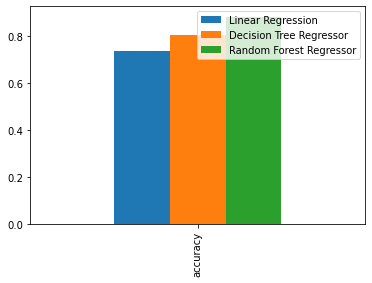

In [32]:
print(fit_and_score(models, X_train, X_test, Y_train, Y_test))
model_compare = pd.DataFrame(fit_and_score(models, X_train, X_test, Y_train, Y_test), index=["accuracy"])
model_compare.plot.bar()

# 6. Feature Scaling

In [33]:
scaller = StandardScaler()
x_train_sc = scaller.fit_transform(X_train)
x_test_sc = scaller.transform(X_test)
x_train_sc[0:10,:]

array([[ 1.16591877e+00, -1.04064318e+00, -3.76704338e+00,
        -6.43848689e-01, -3.89447874e-01, -5.76348029e-02,
        -1.03858157e+00,  1.06422030e+00, -6.06750120e-02],
       [ 1.16591877e+00, -1.16758995e+00,  2.65460176e-01,
        -6.43848689e-01,  3.36856102e-01,  7.08048762e-01,
         9.62851667e-01, -9.39655072e-01, -6.06750120e-02],
       [-4.26849632e-01,  1.01877812e-01,  2.65460176e-01,
         9.59582180e-01, -3.84621934e-01, -1.67785772e-01,
        -1.03858157e+00,  1.06422030e+00, -6.06750120e-02],
       [ 5.28811408e-01, -1.19297931e+00,  2.65460176e-01,
        -6.43848689e-01, -1.31361539e+00, -1.25138473e+00,
        -1.03858157e+00,  1.06422030e+00, -6.06750120e-02],
       [ 8.47365088e-01, -7.86749623e-01,  2.65460176e-01,
         2.56301305e+00,  5.39545584e-01,  1.92776925e+00,
         9.62851667e-01, -9.39655072e-01, -6.06750120e-02],
       [ 8.47365088e-01, -1.52015741e-01,  2.65460176e-01,
        -6.43848689e-01, -2.66386403e-01,  2.396832

{'Linear Regression': 0.7363909066368024, 'Decision Tree Regressor': 0.8079823420719582, 'Random Forest Regressor': 0.8830936101080034}


<Axes: >

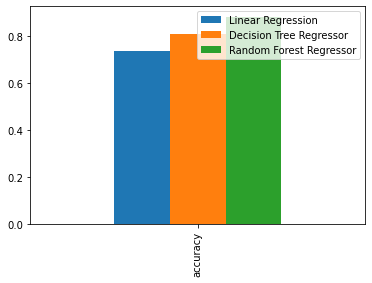

In [34]:
print(fit_and_score(models, x_train_sc, x_test_sc, Y_train, Y_test))
model_compare = pd.DataFrame(fit_and_score(models, x_train_sc, x_test_sc, Y_train, Y_test), index=["accuracy"])
model_compare.plot.bar()

=> à partir du graphique, nous pouvons décider que Random Forest Regressor est le meilleur modèle pour cette base de données.


# 7. Entraînement du modèle

In [35]:
model = RandomForestRegressor()

In [36]:
# Formation du modèle RandomForestRegressor avec les données de formation
model.fit(x_train_sc, Y_train)

RandomForestRegressor()

# 8. Validation et ajustement

In [37]:
# accuracy on training data
X_train_prediction = model.predict(x_train_sc)


# Assuming y_true contains true target values and y_pred contains predicted target values
mae = mean_absolute_error(Y_train, X_train_prediction)
mse = mean_squared_error(Y_train, X_train_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(Y_train, X_train_prediction)
print(f"""************************** Evaluation ***************************
******************* MAE = {mae}
******************* MSE = {mse}
******************* RMSE = {rmse}
******************* R2 = {r2}
*****************************************************************""")

************************** Evaluation ***************************
******************* MAE = 23435.727249147003
******************* MSE = 1210353254.8415947
******************* RMSE = 34790.13157263989
******************* R2 = 0.9762902368517649
*****************************************************************


## Feature importance

In [38]:
feature_dict = dict(zip(X.columns, list(model.feature_importances_)))
feature_dict

{'year': 0.47609199537033053,
 'km_driven': 0.06215991651423945,
 'transmission': 0.0038365243853163565,
 'owner': 0.010694149649381566,
 'engine': 0.12950139753612405,
 'max_power': 0.31115587512631376,
 'fuel_2': 0.004001506130334423,
 'fuel_3': 0.00247801852198082,
 'fuel_LPG': 8.061676597900668e-05}

<Axes: title={'center': 'Feature Importance'}>

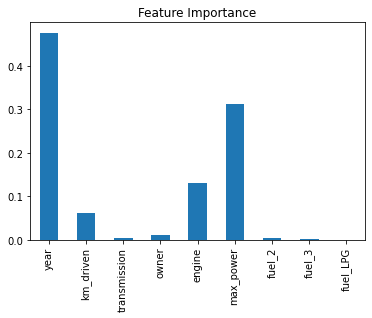

In [39]:
# Visualize feature importance
feature_data = pd.DataFrame(feature_dict, index=[0])
feature_data.T.plot.bar(title="Feature Importance", legend=False)

# 9. Enregistrer le modèle

In [40]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

<h2 style="text-align:right;">Passer à l'étape 3 ...</h2>